<p><span style="color: #ff0000;">Por favor, antes de empezar el examen cambia el nombre de la hoja (File&gt;Rename worksheet) poniendo en lugar de "nombre.apellido" los tuyos tal como aparecen en tu direcci&oacute;n de correo electr&oacute;nico de la UAM. El final del nombre de la hoja, -labot-ex2-2016, dej&aacute;lo como est&aacute;.<br /></span></p>
<p><span style="color: #ff0000;">Una vez hayas terminado el examen, salva la hoja (File&gt;Save worksheet to a file....) y d&eacute;jala en la carpeta en tu escritorio con nombre "ENTREGA......".</span></p>
<h4><span style="color: #ff0000;"><span style="color: #000000;">Ejercicio 1</span><br /></span></h4>
<p>&nbsp;<span style="color: #ff0000;">(2 puntos)</span> <span style="color: #ff0000;">Define&nbsp; funciones</span> $H(n,nbits)$&nbsp; y $H2(n,nbits)$ que devuelvan la suma $\sum_{k=1}^{k=n} \frac{1}{k}$ calculada con precisi&oacute;n igual a $nbits$. Las dos funciones ser&aacute;n esencialmente iguales,&nbsp; pero $H$ realizar&aacute; todos los c&aacute;lculos con n&uacute;meros decimales de la precisi&oacute;n fijada mientras que&nbsp; $H2$ debe efectuar los c&aacute;lculos con racionales,&nbsp; y &uacute;nicamente al devolver el resultado debe convertir a decimal de $nbits$ de precisi&oacute;n.<span style="color: #ff0000;"> &iquest;Qu&eacute; ense&ntilde;a este ejemplo?</span></p>

In [10]:
def H(n,nbits):
    R = RealField(prec=nbits)
    S = R(0)
    for j in xsrange(1,n+1):
        S += R(1/j)
    return S

In [2]:
def H2(n,nbits):
    R = RealField(prec=nbits)
    S = 0
    for j in xsrange(1,n+1):
        S += 1/j
    return R(S)

In [3]:
time H(5*10^5,50)

13.699580042309
Time: CPU 0.41 s, Wall: 0.41 s

In [4]:
time H2(5*10^5,50)

13.699580042306
Time: CPU 34.49 s, Wall: 34.51 s

<p>En muchos de los c&aacute;lculos que nos interesan, en este cap&iacute;tulo 7,&nbsp; sumamos t&eacute;rminos de series de n&uacute;meros racionales. Si efectuamos la suma como n&uacute;meros racionales corremos el peligro de que las fracciones implicadas tengan numeradores y denominadores grandes,&nbsp; lo que hace que el c&aacute;lculo exacto con racionales sea muy costoso. Si lo que realmente nos interesa es el resultado final como decimal con un cierto n&uacute;mero de bits de precisi&oacute;n&nbsp; y no la fracci&oacute;n que determina ese decimal, <span style="color: #ff0000;">este ejemplo muestra</span> que nos conviene hacer todos los c&aacute;lculos con decimales de la precisi&oacute;n fijada.</p>
<h4>Ejercicio 2</h4>
<p>Sabemos que la serie $\sum_{k=1}^{k=\infty} \frac{1}{k}$ es divergente. Adem&aacute;s, sabemos que sus sumas parciales $H_n:=\sum_{k=1}^{k=n} \frac{1}{k}$&nbsp; tienen un valor no muy diferente a $log(n)$ (logaritmo neperiano siempre) ya que</p>
<p>$\int_1^x \frac{1}{t}dt=log(x),$</p>
<p>y $H_n$ es una suma de Riemann de esta integral con los puntos de la partici&oacute;n con coordenadas enteras. Podemos entonces decir que la serie diverge (aproximadamente) como el logaritmo.</p>
<p>Euler defini&oacute; la constante</p>
<p>$\gamma:=\lim_{n\to \infty}(H_n-log(n)),$</p>
<p>cuya existencia nos indica que la diferencia entre $H_n$ y el logaritmo de $n$ no crece con $n$. Sage dispone de un procedimiento, $euler\_gamma$, para calcular con la precisi&oacute;n que queramos la constante de Euler.</p>
<ol><ol><ol>
<li><span style="color: #ff0000;">(1 punto) Define una funci&oacute;n</span> $mi\_gamma1(n,nbits)$ que calcule el t&eacute;rmino $n$-&eacute;simo de la sucesi&oacute;n que define $gamma$ con $nbits$ de precisi&oacute;n.</li>
<li><span style="color: #ff0000;"><span style="color: #ff0000;">(1 punto)</span> Define una funci&oacute;n</span> $mi\_gamma2(n,nbits)$ que calcule $\gamma_n:= \sum_{k=1}^{k=n} \frac{1}{n}\left(\left\lceil \frac{n}{k}\right\rceil -\frac{n}{k}\right)$ con $nbits$ de precisi&oacute;n. La notaci&oacute;n $\lceil x\rceil$ indica la parte entera por exceso de $x$. El l&iacute;mite, cuando $n$ tiende a infinito, de $\gamma_n$ se sabe que es $\gamma$.</li>
<li><span style="color: #ff0000;"><span style="color: #ff0000;"><span style="color: #ff0000;">(1 punto)</span></span> Define una funci&oacute;n</span> $mi\_gamma3(n,nbits)$ que calcule $gamma$ sumando $n$ t&eacute;rminos de la serie $\sum_{k=1}^{k=\infty} \left(\frac{1}{k}-log(1+\frac{1}{k})\right),$ que tambi&eacute;n converge a $\gamma.$</li>
<li><span style="color: #ff0000;"><span style="color: #ff0000;"><span style="color: #ff0000;">(1 punto)</span></span> Compara</span> la cantidad de cifras correctas obtenidas y los tiempos de c&aacute;lculo para los tres m&eacute;todos,&nbsp; usando $n=10^6$ y&nbsp; fijando la precisi&oacute;n &oacute;ptima mediante experimentaci&oacute;n. <span style="color: #ff0000;">&iquest;Qu&eacute; conclusiones obtienes y cu&aacute;l puede ser el motivo?</span></li>
</ol></ol></ol>
<p>&nbsp;</p>

In [16]:
def mi_gamma1(n,nbits):
    R = RealField(prec=nbits)
    return H(n, nbits)-R(log(n))

def mi_gamma2(n, nbits):
    R = RealField(prec=nbits)
    suma = 0
    for i in xsrange(1, n+1):
        suma += (R(1/n))*(R(ceil(n/i))-R(n/i))
    return suma

def mi_gamma3(n,nbits):
    R = RealField(prec=nbits)
    suma = 0
    for i in xsrange(1, n+1):
        suma += R(1/i)-R(log(1+1/i))
    return suma

prec = 100
n = 10^6
euler_gamma.n(prec)
show(mi_gamma1(n, prec))
show(mi_gamma2(n,prec))
show(mi_gamma3(n, prec))

0.57721616490144952727317875985

0.57725827713427636861887250679

0.57721516490194952693984568130

In [ ]:
g
g
g
g
g
g

g
g
g

g
g

g
g

g
g


In [5]:
##Apartado 1
def mi_gamma1(n,nbits):
    R = RealField(prec=nbits)
    return -R(log(n))+H(n,nbits)

In [6]:
##Apartado 2
def F(n,nbits):
    R = RealField(prec=nbits)
    S = 0
    for j in xsrange(1,n+1):
        x = R(n/j)
        S += ceil(x)-x
    return S

In [7]:
def mi_gamma2(n,nbits):
    R = RealField(prec=nbits)
    return R(F(n,nbits)/n)

In [8]:
##Apartado 3
def mi_gamma3(n,nbits):
    R = RealField(prec=nbits)
    S = 0
    for j in xsrange(1,n+1):
        x = R(1/j)
        S += x-R(log(1+x))
    return S

In [9]:
##Apartado 4
euler_gamma.n()

0.577215664901533

In [10]:
time mi_gamma1(10^6,53)

0.577216164900715
Time: CPU 0.82 s, Wall: 0.82 s

In [11]:
time mi_gamma1(10^6,106)

0.5772161649014495272731787649864
Time: CPU 0.84 s, Wall: 0.84 s

<p>En este caso vemos que la precisi&oacute;n est&aacute;ndar de $53$ bits es suficiente para obtener $5$ cifras decimales correctas, y que no obtenemos m&aacute;s cifras correctas por aumentar la precisi&oacute;n.</p>

In [12]:
time mi_gamma2(10^6,53)

0.577258277134282
Time: CPU 3.72 s, Wall: 3.73 s

In [13]:
time mi_gamma2(10^6,106)

0.5772582771342763686188725068125
Time: CPU 3.76 s, Wall: 3.76 s

<p>Vemos que el segundo m&eacute;todo obtiene s&oacute;lo $4$ cifras decimales correctas y tarda m&aacute;s de cuatro veces m&aacute;s.</p>

In [14]:
time mi_gamma3(10^6,53)

0.577215164902028
Time: CPU 17.28 s, Wall: 17.29 s

In [15]:
time mi_gamma3(10^6,106)

0.5772151649019495269398456817487
Time: CPU 19.95 s, Wall: 19.96 s

<p>Con el tercer m&eacute;todo se recuperan $5$ cifras correctas pero tarda mas de $20$ vveces m&aacute;s que el primero. <span style="color: #ff0000;">CONCLUSIONES:</span></p>
<ol>
<li>Es bastante claro que el primer m&eacute;todo es mejor que el segundo y &eacute;ste mejor que el tercero. &iquest;Por qu&eacute;?</li>
<li><span style="color: #ff0000;">Debemos contar</span> el n&uacute;mero de operaciones que se hacen al aplicar cada uno de los m&eacute;todos: En el primero calculamos $n$ sumas y un logaritmo, en el segundo calculamos $n$ divisiones y $n$ sumas, y en el tercero $n$ divisiones, $n$ logaritmos y $n$ sumas. </li>
</ol>

<h4>Ejercicio 3</h4>
<p>(2 puntos) Se define la funci&oacute;n $\sigma(n)$ como la suma de todos los divisores positivos del entero positivo $n$. Sage dispone de la funci&oacute;n $sigma$ que realiza este c&aacute;lculo. <span style="color: #ff0000;">Determina</span> (experimentalmente) el mayor entero positivo tal que la diferencia</p>
<p>$e^\gamma\cdot n \cdot log(log(n))-\sigma(n)$</p>
<p>es negativa ($\gamma$ es la constante de Euler).</p>

In [24]:
def mayor(n):
    entero = 0
    for i in xsrange(1,n+1):
        a = exp(euler_gamma.n())*i*log(log(i))-sigma(i)
        if a < 0:
            entero = i
    return entero
mayor(10^3)

840

In [ ]:
h
h
h
h
h

h
h
h
h

h
h

h
h

h
h

hh

h
h


In [25]:
def FF(n,nbits):
    R = RealField(prec=nbits)
    return exp(R(euler_gamma))*n*R(log(log(n)))-sigma(n)

In [26]:
def mayor(N,nbits):
    max = 1
    for n in xsrange(1,N):
        if FF(n,nbits)<0.0:
            max = n
    return max

In [18]:
time mayor(10^3,53)

840
Time: CPU 0.22 s, Wall: 0.22 s

In [19]:
time mayor(10^4,53)

5040
Time: CPU 2.20 s, Wall: 2.20 s

In [20]:
time mayor(10^5,53)

5040
Time: CPU 21.52 s, Wall: 21.53 s

<p><span style="color: #ff0000;">Vemos que el entero buscado podr&iacute;a ser $5040$</span> ya que no hay ninguno con $FF(n,53)$ negativo entre $5041$ y $10^5$. Si quisi&eacute;ramos comprobar hasta $10^6$ debemos esperar que tarde del orden de $200$ segundos, que no es demasiado. La precisi&oacute;n no parece ser importante en este problema, por lo que usamos la est&aacute;ndar de $53$ bits.</p>

In [21]:
time mayor(10^6,53)

5040
Time: CPU 132.51 s, Wall: 132.60 s

<p>El comportamiento de la funci&oacute;n $FF(n,nbits)$ debe ser bastante err&aacute;tico ya que $\sigma(n)$ vale s&oacute;lo $1+n$ si n es primo, y, en cambio es mucho m&aacute;s&nbsp; grande que $n$ si $n$ tiene muchos factores&nbsp; primos elevados a exponentes grandes. Podemos obtener una idea del aspecto de la funci&oacute;n mediante una gr&aacute;fica.&nbsp;</p>

In [31]:
L = [(n,FF(n,53)) for n in srange(2,10^4)]

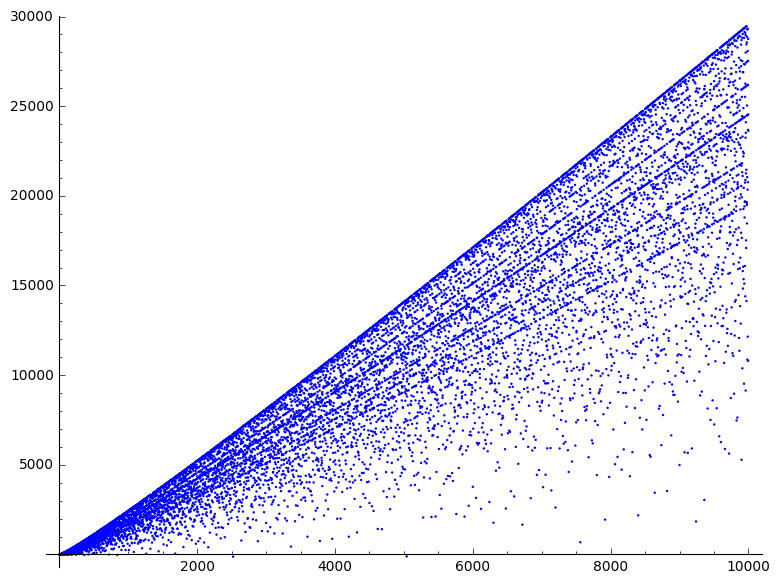

In [33]:
point(L,pointsize=3)

<p>En el gr&aacute;fico se ven algunos de los valores negativos de $FF(n,nbits)$, y, en particular que debe haber uno hacia el $2500$ y otro, el mayor, alrededor del $5000$.&nbsp; No se sabe si es cierto que $5040$ es el mayor entero tal que $FF(n,nbits)$ es negativo, pero esa afirmaci&oacute;n se ha demostrado que es equivalente a la "hip&oacute;tesis de Riemann", que se considera un&aacute;nimemente como el problema (actualmente)&nbsp; abierto m&aacute;s importante de las Matem&aacute;ticas. </p>

<h4>Ejercicio 4</h4>
<p>Definimos una sucesi&oacute;n de n&uacute;meros racionales mediante</p>
<p>$G_1=0,\ G_2=1,\ G_n=G_{n-1}+\frac{1}{n-2}G_{n-2} \ (n\ge 3)$</p>
<ol>
<li><span style="color: #ff0000;">(1 punto) Comprueba</span> (experimentalmente)&nbsp; que la fracci&oacute;n $\frac{n}{G_n}$ tiende al n&uacute;mero $e$.</li>
<li><span style="color: #ff0000;">(1 punto) Compara</span> la eficiencia de esta manera de aproximar $e$&nbsp; con la de la forma,&nbsp; m&aacute;s conocida,&nbsp; que utiliza la serie $e=\sum_{n=0}^{n=\infty}\frac{1}{n!}$</li>
</ol>

<p>Programamos la recursi&oacute;n iterativamente, de forma similar a lo que hicimos para la sucesi&oacute;n de Fibonacci.</p>

In [ ]:
N = RealField(prec = 200)

def Gsuc(n):
    if n == 1:
        return 0
    elif n == 2:
        return 1
    return Gsuc(n-1) + N((1/n-2)*Gsuc(n-2))

a = Gsuc(100)
show(RR(100/a))
show(RR(e))

In [ ]:
g
gh
g
g
g
g
g
g
g
gh

g
g
g
g
g
g
g

g
g
g


In [24]:
def G(n):
    a,b = 0,1
    for j in xsrange(3,n):
        b,a = b+(a/(j-2)),b
    return b

In [25]:
x = G(1000);RR(1000/x);RR(e)

2.72100283129034
2.71828182845905

<p>Ahora efectuamos el c&aacute;llculo mediante un bucle $while$ hasta alcanzar un n&uacute;mero prefijado de cifras decimales correctas.</p>

In [26]:
def E(n,nbits):
    R = RealField(prec=nbits)
    a,b,k = R(0),R(1),3
    while abs(R(k/b)-R(e))>R(10^(-n)):
        b,a = R(b)+R(a/(k-2)),b
        k += 1
        #if k%10000 == 0:
        #    print "otros 10000"  ##,k,abs(R(k/b)-R(e))
    return R(k/b),R(k/b)-R(e),k

In [27]:
time E(3,53)

(2.71928156432821, 0.000999735869168905, 2720)
Time: CPU 0.02 s, Wall: 0.02 s

In [28]:
time E(6,53)

(2.71828282845870, 9.99999657302908e-7, 2718652)
Time: CPU 15.68 s, Wall: 15.69 s

<p>No intento calcular m&aacute;s cifras correctas de $e$ mediante este m&eacute;todo: al pasar de $3$ cifras a $6$ se multiplica por $1000$ el sub&iacute;ndice $n$ de la sucesi&oacute;n y por $800$ el tiempo de c&aacute;lculo. &nbsp; Comparo con la serie:</p>

In [29]:
def Eserie(n,nbits):
    R = RealField(prec=nbits)
    S,k =R(2),1
    while abs(R(S)-R(e))>R(10^(-n)):
        k += 1
        S += R(1/factorial(k))
    return R(S),R(S)-R(e),k

In [30]:
time Eserie(6,53)

(2.71828152557319, -3.02885852843104e-7, 9)
Time: CPU 0.00 s, Wall: 0.00 s

In [31]:
time Eserie(12,53)

(2.71828182845823, -8.14903700074865e-13, 14)
Time: CPU 0.00 s, Wall: 0.00 s

In [32]:
time Eserie(24,53)

^C

Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
  File "_sage_input_17.py", line 10, in <module>
    exec compile(u'open("___code___.py","w").write("# -*- coding: utf-8 -*-\\n" + _support
_.preparse_worksheet_cell(base64.b64decode("dGltZSBFc2VyaWUoMjQsNTMp"),globals())+"\\n");
execfile(os.path.abspath("___code___.py"))' + '\n', '', 'single')
  File "", line 1, in <module>

  File "/tmp/tmp1B1Vlg/___code___.py", line 3, in <module>
    exec compile(u'__time__=misc.cputime(); __wall__=misc.walltime();
Eserie(_sage_const_24 ,_sage_const_53 ); print "Time: CPU %.2f s, Wall: %.2f
s"%(misc.cputime(__time__), misc.walltime(__wall__))' + '\n', '', 'single')
  File "", line 1, in <module>

  File "/tmp/tmpf6N5Lt/___code___.py", line 8, in Eserie
    S += R(_sage_const_1 /factorial(k))
  File "sage/symbolic/function.pyx", line 847, in
sage.symbolic.function.GinacFunction.__call__
(build/cythonized/sage/symbolic/function.cpp:9392)
  File "sage/symbolic/function.pyx", line

In [33]:
time Eserie(24,106)

(2.718281828459045235360287404308, -6.704430225860226707718604610268e-26, 24)
Time: CPU 0.00 s, Wall: 0.00 s

<p>No podemos calcular $24$ cifras de $e$ usando $53$bits de precisi&oacute;n, y el bucle en el primer caso es infinito. Doblando la precisi&oacute;n obtenemos m&aacute;s de $4\times 24=96$ bits d eprecisi&oacute;n, y el c&aacute;lculo se realiza en menos de cent&eacute;simas de segundo.&nbsp; Es claro que la serie es un m&eacute;todo mucho m&aacute;s eficiente, posiblemente debido a que</p>
<ol>
<li>Como $n!$ crece de forma tan bestial, los t&eacute;rminos que sumamos son en seguida irrelevantes para alcanzar la precisi&oacute;n deseada.</li>
<li>Sage dispone de un m&eacute;todo muy eficiente para calcular factoriales, de forma que algo que, en principio,&nbsp; suena improbable, que se pueda calcular r&aacute;pido el factorial de un n&uacute;mero grande, de hecho es cierto.</li>
</ol>
<p>Las celdas que siguen calculan el n&uacute;mero de cifras decimales de factoriales grandes y el tiempo de c&aacute;lculo.</p>

In [34]:
time floor(log(factorial(1234567),base=10))

6984220
Time: CPU 0.24 s, Wall: 0.24 s

In [35]:
time floor(log(factorial(12345678),base=10))

82187904
Time: CPU 3.96 s, Wall: 3.96 s

In [36]:
time floor(log(factorial(123456789),base=10))

945335859
Time: CPU 96.49 s, Wall: 96.55 s